In [ ]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
!pip install scikit-learn-extra

# Jupyter will display that variable without the need for a print statement
# Reference : https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/


#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#Reading the files
df_train = pd.read_csv("diabetic_data_train.csv")
df_test = pd.read_csv("diabetic_data_test.csv")

Columns encounter_id and patient_nbr are just unique values for each patient so we can drop them as they won't 
contribute to the prediction. Column payer_code will not affect the model, also 52% of the data is missing so we drop that
column medical_specialty is also dropped beacuse more tha 50% of data is missing.

In [ ]:
df_train = df_train.drop(['encounter_id','patient_nbr','payer_code','medical_specialty'], axis=1)
df_test = df_test.drop(['encounter_id','patient_nbr','payer_code','medical_specialty'], axis=1)

Since 98569 out of 101766(96.7%) the entries in weight column are not given it should be dropped. Read the discription later so calculated it.

In [ ]:
df_train = df_train.drop(['weight'], axis=1)
df_test = df_test.drop(['weight'], axis=1)

In [ ]:
print("Shape of training data: ",df_train.shape)
print("Shape of testing data: ",df_test.shape)

Shape of training data:  (76324, 46)
Shape of testing data:  (25442, 46)


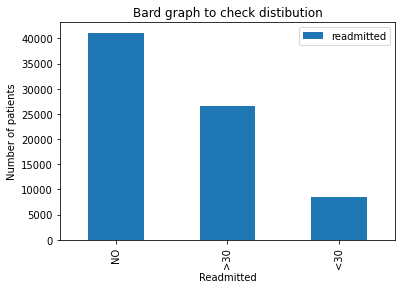

In [ ]:
# To check the distribution of target variable
df_train['readmitted'].value_counts().plot(kind='bar',ylabel='Number of patients',xlabel='Readmitted');
plt.title('Bard graph to check distibution')
plt.legend()
plt.show()

In [ ]:
#To check the number of unique values in a particular attribute
df_train.nunique()

Unnamed: 0                  76324
race                            6
gender                          3
age                            10
admission_type_id               8
discharge_disposition_id       26
admission_source_id            17
time_in_hospital               14
num_lab_procedures            117
num_procedures                  7
num_medications                74
number_outpatient              37
number_emergency               29
number_inpatient               21
diag_1                        693
diag_2                        716
diag_3                        750
number_diagnoses               16
max_glu_serum                   4
A1Cresult                       4
metformin                       4
repaglinide                     4
nateglinide                     4
chlorpropamide                  4
glimepiride                     4
acetohexamide                   2
glipizide                       4
glyburide                       4
tolbutamide                     2
pioglitazone  

Column Unnamed: 0 is not necessary so that too is dropped, it was not in the original dataset.

In [ ]:
df_train = df_train.drop(['Unnamed: 0'], axis=1)
df_test = df_test.drop(['Unnamed: 0'], axis=1)

In [ ]:
# To check the shape after dropping the columns
print("Shape of training data after dropping the columns: ",df_train.shape)
print("Shape of test data after dropping the columns: ",df_test.shape)

Shape of training data after dropping the columns:  (76324, 45)
Shape of test data after dropping the columns:  (25442, 45)


In [ ]:
# TO check the number of null values given as ? in the dataset
print("The number of null values given as ? in the train dataset:",len(df_train[df_train['race'].map(lambda x : x == "?")]))

print("The number of null values given as ? in the test dataset:",len(df_test[df_test['race'].map(lambda x : x == "?")]))


The number of null values given as ? in the train dataset: 1708
The number of null values given as ? in the test dataset: 565


To check if both have same modes and we fill all '?' ie null values with same value.
Replacing missing values in column 'race' with mode because it is a nominal attribute and just 1% is missing. We can also use 'others' instead of the mode of the attribute race.

In [ ]:
print("Mode of column race in train set:",df_train['race'].mode())
print("Mode of column race in test set:",df_test['race'].mode())

Mode of column race in train set: 0    Caucasian
dtype: object
Mode of column race in test set: 0    Caucasian
dtype: object


In [ ]:
df_train['race'].replace('?',"df_train['race'].mode()",inplace = True)
df_test['race'].replace('?',"df_test['race'].mode()",inplace = True)
print("The number of null values given as ? in the dataset train and test set respectively: ")
print(len(df_train[df_train['race'].map(lambda x : x == "?")]))
print(len(df_test[df_test['race'].map(lambda x : x == "?")]))

The number of null values given as ? in the dataset train and test set respectively: 
0
0


Replacing missing values column in diag_3 with mode because it is a nominal attribute and just 1% is missing.

In [ ]:
df_train['diag_3'].replace('?',"df_train['diag_3'].mode()",inplace = True)
df_test['diag_3'].replace('?',"df_test['diag_3'].mode()",inplace = True)
print(len(df_train[df_train['diag_3'].map(lambda x : x == "?")]))
print(len(df_test[df_test['diag_3'].map(lambda x : x == "?")]))

0
0


The objective of predictive analysis is to build a binary classification model that can predict early (<30 days) 
readmission given the patient’s features. So we replace all other values to not readmited just for the sake of the problem.

In [ ]:
df_train['readmitted'].replace('>30','NO',inplace = True)
df_test['readmitted'].replace('>30','NO',inplace = True)

In [ ]:
# verifying that all '>30' are changed to 'NO'
df_train['readmitted'].unique()
df_test['readmitted'].unique()

array(['NO', '<30'], dtype=object)

### Label encoding

In [ ]:
# Label encoding to transform non-numerical labels to numerical labels. May change this for the final draft as the model may
# consider the numerical values as ordinal

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['race','gender','age','admission_type_id','discharge_disposition_id','admission_source_id','diag_1','diag_2','diag_3',
'max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide',
'glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton',
'insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone',
'change','diabetesMed','readmitted']

df_train[cols] = df_train[cols].apply(le.fit_transform)
df_test[cols] = df_test[cols].apply(le.fit_transform)

After one hot encoding the shapes of the data
            test data - (25442, 1910)
            train data - (76324, 2321)
as we can see some of the coulmns as in the train data are not present in the test data, so we cannot train the model with inconsistent number of columns hence I have chosen to continue with label encoder

### Visualization

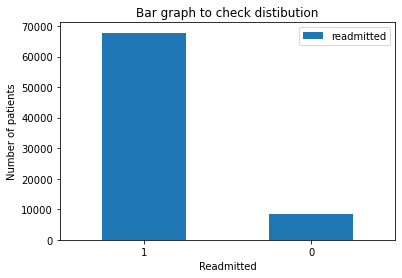

In [ ]:
# Plotting the bar graph to check the distribution of the target attribute
df_train['readmitted'].value_counts().plot(kind='bar',ylabel='Number of patients',xlabel='Readmitted');
plt.title('Bar graph to check distibution')
plt.legend()
plt.xticks(rotation = 0)
plt.show()

We can see that the dataset is unbalanced so accuracy is not the best measure. We can use precision here

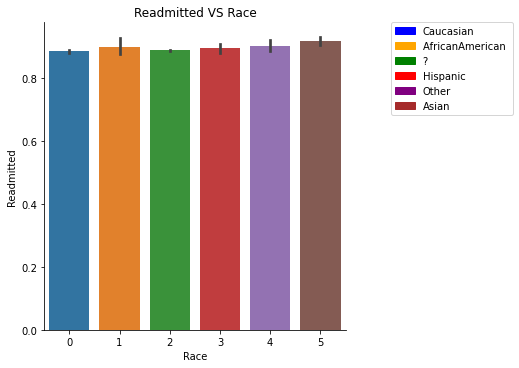

In [ ]:
# sns.catplot: This function provides access to several axes-level functions that show the relationship between a numerical 
# and one or more categorical variables using one of several visual representations.

#Reference: https://seaborn.pydata.org/generated/seaborn.catplot.html

sns.catplot(x = 'race', y = 'readmitted',data = df_train, kind = "bar",height = 5)
plt.ylabel("Readmitted")
plt.xlabel("Race")     
plt.title("Readmitted VS Race")
colors = {'Caucasian':'blue', 'AfricanAmerican ':'orange', '?':'green', 'Hispanic':'red', 'Other':'purple', 'Asian':'brown'}    
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels,bbox_to_anchor=(1.15,1), loc='upper left', borderaxespad=0)
plt.show()

The null values '?' are converted to caucasian

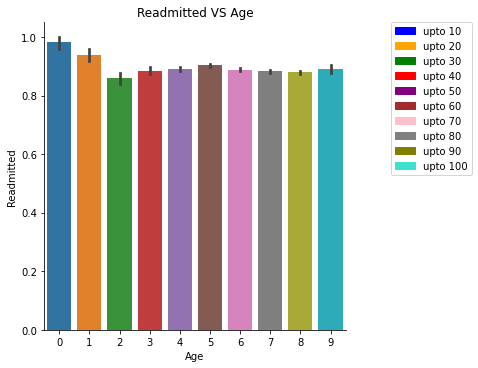

In [ ]:
sns.catplot(x = "age", y = "readmitted", data = df_train, kind = "bar", height = 5)
plt.ylabel("Readmitted")
plt.xlabel("Age")
plt.title("Readmitted VS Age")
colors = {'upto 10':'blue', 'upto 20':'orange', 'upto 30':'green', 'upto 40':'red', 'upto 50':'purple', 'upto 60':'brown', 'upto 70':'pink', 'upto 80':'grey', 'upto 90':'olive', 'upto 100':'turquoise'}    
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels,bbox_to_anchor=(1.15,1), loc='upper left', borderaxespad=0)
plt.show()

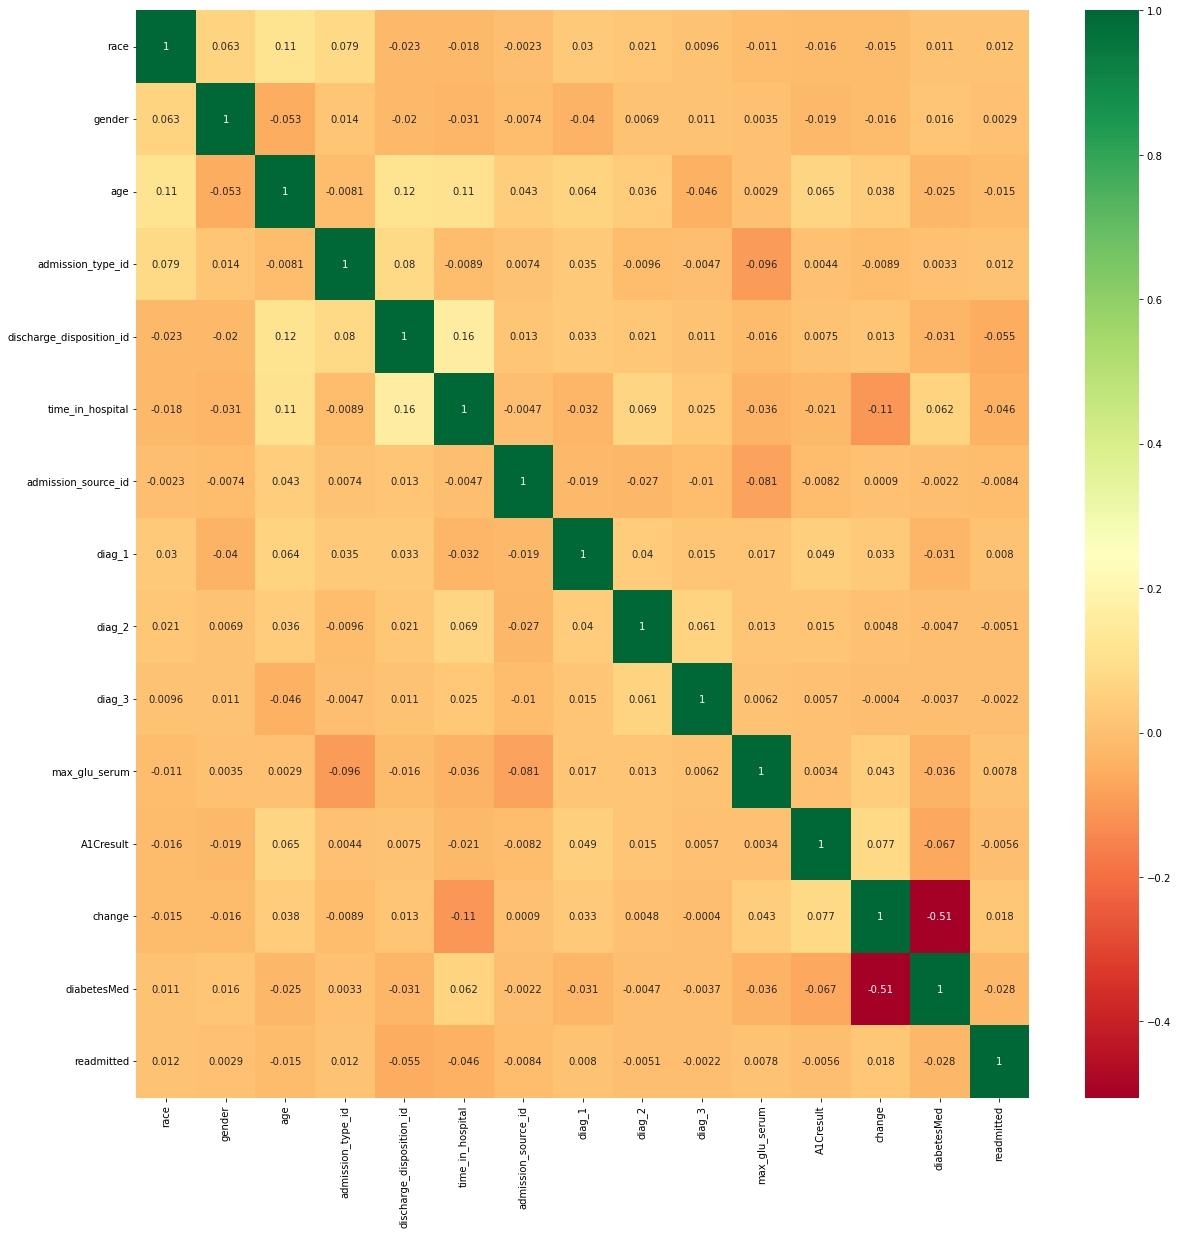

In [ ]:
# Correlation matrix to displays the correlation coefficients for different attributes
f,ax = plt.subplots(figsize=(20, 20))
df_corr = df_train[['race','gender','age','admission_type_id','discharge_disposition_id','time_in_hospital','admission_source_id','diag_1','diag_2','diag_3',
'max_glu_serum','A1Cresult','change','diabetesMed','readmitted']]
sns.heatmap(df_corr.corr().round(4), annot=True,ax=ax,cmap="RdYlGn")
plt.show()

We can see that gender and diagnosis 3 is not highly correlated to readmission as compared to others so ill drop that column.

In [ ]:
# Dropping the useless columns
X_train = df_train.drop('gender',axis=1)
X_test = df_test.drop('gender',axis=1)
X_train = df_train.drop('diag_3',axis=1)
X_test = df_test.drop('diag_3',axis=1)

### Dropping target cloumns and Splitting the dataset further

In [ ]:
# Dropping the target column
X_train = df_train.drop('readmitted',axis=1)
y_train = df_train.readmitted

X_test = df_test.drop('readmitted',axis=1)
y_test = df_test.readmitted

In [ ]:
## Splitting the dataset into validation set from training set

from sklearn.model_selection import train_test_split

## Split size 80:20
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, test_size=0.20, random_state = 633)

## To print the size of datasets
print("Length of training set:",len(X_train))
print("Length of validation set:",len(X_val))

Length of training set: 61059
Length of validation set: 15265


### Cross validation to check which classifier gives the best results.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Decision Tree

# Training Time Complexity= O(n*log(n)*d)
# Run-time Complexity= O(max depth)
# number of points in the Training set(n), dimentionality(d)

cross_val_score(DecisionTreeClassifier(max_depth=4,min_samples_split=3,random_state=633),X_train,y_train,cv=5).mean()

0.8871092008856287

In [ ]:
#RANDOM FOREST CLASSIFIER

# Training Time Complexity= O(n*log(n)*d*k)
# Run-time Complexity= O(depth of tree*k)
# Space Complexity= O(depth of tree*k)
# k=number of Decision Trees,n= number of training examples, d= number of dimensions of the data

cross_val_score(RandomForestClassifier(random_state=633),X_train,y_train,cv=5).mean()

0.8872238355160436

In [ ]:
#KNN

# Train Time Complexity = O(knd)
# Space Complexity = O(nd)
# number of instances (n) and dimensions (d)

cross_val_score(KNeighborsClassifier(),X_train,y_train,cv=5).mean()

0.8772007543525202

In [ ]:
#LOGISTIC REGRESSION

#Train Time Complexity=O(nd)
#Space Complexity = O(d)

cross_val_score(LogisticRegression(random_state=633),X_train,y_train,cv=5).mean()

0.8864213394553347

In [ ]:
#from sklearn_extra.cluster import KMedoids
#cross_val_score(KMedoids(n_clusters=5,metric='manhattan',random_state=633) ,X_train,y_train,cv=5).mean()

NOTE FOR EACH CLASSIFIER

    KNN: Because each test instance must be compared to the entire training set, training and testing takes longer.

    LOGISTIC REGRESSION: Good for low latency

    SVM: Not efficient when training set is huge

    DECISION TREE: When dealing with HUGE amounts of low-dimensional data, we can apply decision tree.

    RANDOM FOREST: Random Forest is comparatively faster than other algorithms BUT take more space

    KMedoids: Tried but couldnt implement.

Taking into consideration all the above factors like time-complexity, space-complexity and run-time,
I am chosing decision tree classifier as it is faster than most of the classifiers and also give almost similar accuracy as other classifiers that take a lot more time or space and dont have a significance change in accuracy.

### GridSearch CV to find the best hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
decisionTree = DecisionTreeClassifier(random_state=633)

# Create grid parameters for hyperparameter tuning

params =  {
    'criterion' : ['gini', 'entropy'],             ## default=”gini”
    'min_samples_split': [2, 3, 4],                ##default=2
    'max_depth': [6,8,10],                         ## No default
    'min_samples_leaf': [2]}                       ##default=1

# Create gridsearch instance

grid = GridSearchCV(estimator=decisionTree, #passing the model
                    param_grid=params,      #hypertuning parameters
                    cv=10,                  #number of folds
                    n_jobs=1,               #Number of jobs to run in parallel
                    verbose=2)              #the higher, the more messages

# Fit the model

grid.fit(X_train, y_train)

# Assess the score
print("Best hyperparameters: ")
grid.best_score_,grid.best_params_

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=

(0.8862411832670594,
 {'criterion': 'entropy',
  'max_depth': 6,
  'min_samples_leaf': 2,
  'min_samples_split': 2})

When max depth is less than 4 the classifier predicts everything as readmitted and thus gets higher accuracy. So to find the best hyperparameter ive only selected the max depth more than 4. 

Used this to check but as it takes a lot of time to run ive reduced it for the purpose of the project.

    params =  {
        'criterion' : ['gini', 'entropy', 'log_loss'],
        'min_samples_split': [2, 3, 4,5,6,7,8,9,10],                
        'max_depth': [6,8,10,12,14,16,18,20,30],                         
        'min_samples_leaf': [2,3,4,5,6]
        }  
    
The parameters I've chosen in code are in such a way that the result is not altered.

## Building the model

#### Decision Tree Classifier with default hyper-parameters

In [ ]:
from sklearn import metrics 

#Training decision tree classifier 
DT = DecisionTreeClassifier(random_state=633)
DT.fit(X_train,y_train)

#Computing the training accuracy
y_pred_train = DT.predict(X_train)
print("Trainng Accuracy:",metrics.accuracy_score(y_train,y_pred_train))

Trainng Accuracy: 1.0


In [ ]:
#Computing the validation accuracy to check for overfitting
y_predValidate = DT.predict(X_val)
print("Validation Accuracy:",metrics.accuracy_score(y_val,y_predValidate))

Validation Accuracy: 0.8050442188011792


In [ ]:
#Computing the test accuracy
y_pred = DT.predict(X_test)
print("Testing Accuracy:", metrics.accuracy_score(y_test,y_pred))

Testing Accuracy: 0.7872415690590362


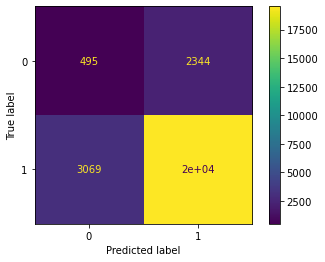

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

### Changing the hyperparameters that we got after grid search

In [ ]:
DT1 = DecisionTreeClassifier(criterion= 'gini',max_depth= 6,min_samples_leaf= 2,min_samples_split= 2,random_state=633)
DT1 = DT1.fit(X_train,y_train)
y_pred2 = DT1.predict(X_test)
print("Test Accuracy after changing hyperparameters:",metrics.accuracy_score(y_test,y_pred2))

Test Accuracy after changing hyperparameters: 0.8876660639886801


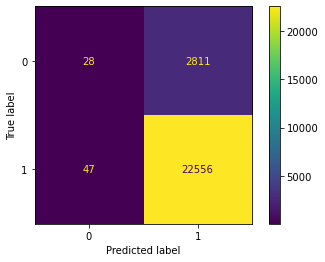

In [ ]:
confusion_matrix2 = metrics.confusion_matrix(y_test, y_pred2)
cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [0,1])
cm_display1.plot()
plt.show()

### Evaluating the model

##### Since this is a medical problem we try to improve the True Positive Rate that is Sensitivity

In [ ]:
TN = confusion_matrix2[0,0]  # true negative
FN = confusion_matrix2[1,0]  # false negative
FP = confusion_matrix2[0,1]  # false posivtive
TP = confusion_matrix2[1,1]  # true positive


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# Precision
precision = TP/(TP+FP)
# Recall
recall = TP/(FN+TP)
# F1 score, F Measure
f_measure = (2*(precision*recall))/(precision+recall)


# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


# Print everything
print("Acc: "+ str(ACC))
print("TPR, Sensitivity: "+ str(TPR))
print("TNR, Specificity: "+ str(TNR))
print("FPR: "+ str(FPR))
print("FNR: "+ str(FNR))
print("precision: "+ str(precision))
print("recall: "+ str(recall))
print("f_measure: "+ str(f_measure))

print('\nFOR VERIFICATION')
print('Precision: ' + str (precision_score(y_test, y_pred2)))
print('Recall: '+ str (recall_score(y_test, y_pred2)))
print('f1_score, F Measure: '+ str (f1_score(y_test, y_pred2)))

Acc: 0.8876660639886801
TPR, Sensitivity: 0.9979206300048666
TNR, Specificity: 0.009862627685804861
FPR: 0.9901373723141952
FNR: 0.0020793699951333895
precision: 0.8891867386762329
recall: 0.9979206300048666
f_measure: 0.9404210965186575

FOR VERIFICATION
Precision: 0.8891867386762329
Recall: 0.9979206300048666
f1_score, F Measure: 0.9404210965186575


In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred)
rmse2 = mean_squared_error(y_test, y_pred2)
print("RMSE before changing hyperparameters:",rmse)
print("RMSE after changing hyperparameters :",rmse2)

RMSE before changing hyperparameters: 0.21275843094096375
RMSE after changing hyperparameters : 0.11233393601131987


We can see the RMSE changed after changing the hyperparameters.

### ROC curve and Area under the curve

Area under the Curve: 0.6386919278701888


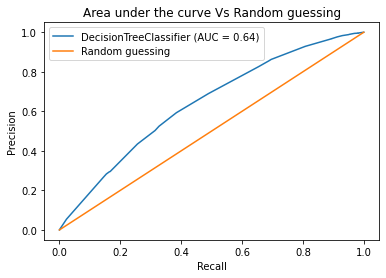

In [ ]:
from sklearn.metrics import roc_auc_score

probs = DT1.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, probs)
print("Area under the Curve: " + str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, probs, pos_label=2)

# plot the precision-recall curve
metrics.plot_roc_curve(DT1, X_test, y_test) 
plt.plot([0, 1], [0, 1], label = 'Random guessing')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# shows the title
plt.title('Area under the curve Vs Random guessing')

# shows the legend
plt.legend()

# show the plot
plt.show()

Planned to make these changes after rough solution:

    1. May use one hot encoding for some columns - reason for not using given above
    2. Corelation matrix was very messy will try to make a cleaner one - done
    3. Normalization - not done as a lot of categorical valriables
    4. With the above mentioed steps I will try to get better results - done


Results 

    Acc: 0.8876660639886801
    TPR, Sensitivity: 0.9979206300048666
    precision: 0.8891867386762329
    recall: 0.9979206300048666
    f_measure: 0.9404210965186575
    Area under the Curve: 0.6386919278701888


Conclusion

    1. Model selection with selection of hyper-parameters is very important  pre processing of data is also very important.
    2. Taking out redundant columns, rows helps reduce the dimentionality of the dataset thus making the model efficient. 
        2.1 For this dataset there were a lot of null values in some columns, decision is taken using the following
            null value threshold.
            a) Null values > 50% , coloumn is dropped
            b) Null values < 3% , replaced  by mode for categorical values and mean for continuous attributes
    3. Visualisation helps to see the spread of the values in dataset. 
    4. Cross validtion is used to check which model gives better results, based on these results decision tree has 
       been selected.factors like time-complexity, space-complexity and run-time are also taken into consideration.
    5. Because this is a medical problem, True Positive Rate should be improved and focused upon. 
    6. Area under the curve (precision vs recall) is not very good and can be improved upon. 